In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
experiment_name = '4'

# Read the output of the model 

Load the data (labels and model output)

In [3]:
model_output= np.load(f'../../Exp_output/test_output_{experiment_name}.npy')
labels = np.load('../../Subset + Split/test/test_target.npy')
lat = np.load('../../Subset + Split/test/test_lat.npy')
lon = np.load('../../Subset + Split/test/test_lon.npy')
images = np.load('../../Subset + Split/test/test_images.npy')

In [4]:
single_image_ch = images[:,0,:,:]
mean_single_image = np.mean(single_image_ch,axis=(1,2))

Check qualitataively on random sample

In [5]:
idx = np.random.randint(0, len(labels))

print(labels[idx])
print(model_output[idx])

4.42
6.333083


Create an error array

In [6]:
error = (labels - model_output)
x_error = np.arange(0, len(error))

mean= np.mean(error)
std = np.std(error)
print(mean)
print(std)

-0.07540595
3.475198


Plot the error and find mean and standard deviation

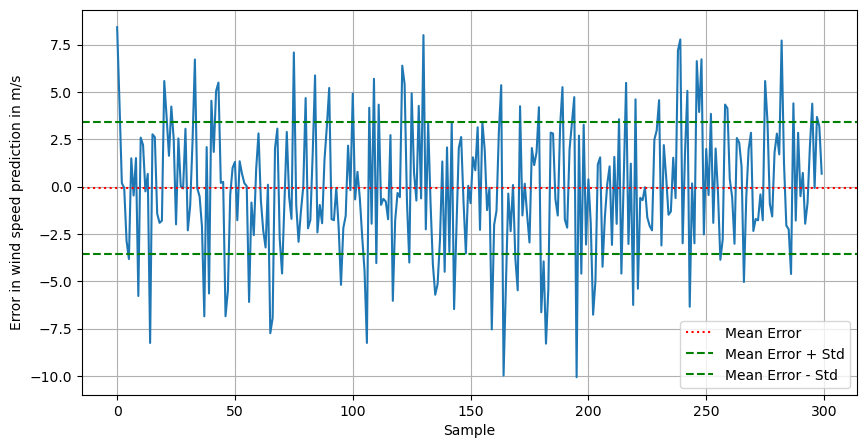

In [7]:
plt.figure(figsize=(10,5))
plt.plot(x_error,error)
plt.ylabel('Error in wind speed prediction in m/s')
plt.xlabel('Sample')
plt.grid()

plt.axhline(y=mean, color='r', linestyle=':', label='Mean Error')
plt.axhline(y=mean+std, color='g', linestyle='--', label='Mean Error + Std')
plt.axhline(y=mean-std, color='g', linestyle='--', label='Mean Error - Std')
plt.legend()

Find distribution of error

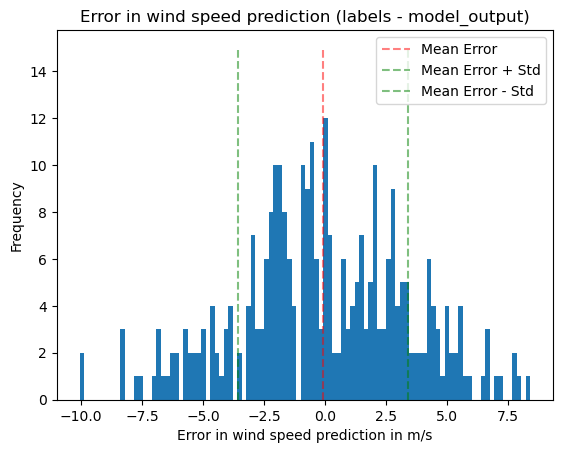

In [8]:
plt.hist(error, bins=100)
plt.xlabel('Error in wind speed prediction in m/s')
plt.ylabel('Frequency')
plt.title('Error in wind speed prediction (labels - model_output)')
plt.vlines(mean, 0, 15, colors='r', linestyles='dashed', label='Mean Error',alpha=0.5)
plt.vlines(mean+std, 0, 15, colors='g', linestyles='dashed', label='Mean Error + Std',alpha=0.5)
plt.vlines(mean-std, 0, 15, colors='g', linestyles='dashed', label='Mean Error - Std',alpha=0.5)
plt.legend()

Create visual representation of the model output vs label

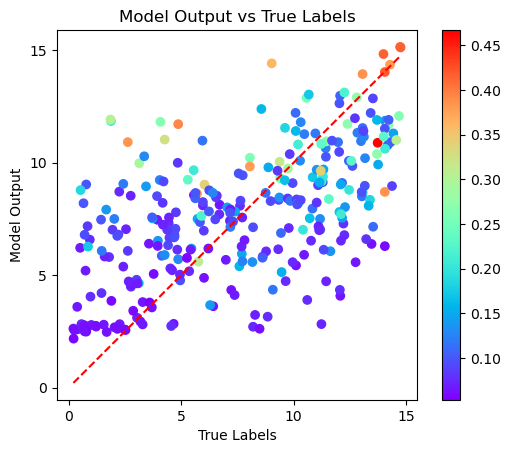

In [9]:
plt.scatter(labels, model_output, c=mean_single_image,cmap='rainbow')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('True Labels')
plt.ylabel('Model Output')
plt.title('Model Output vs True Labels')
plt.xticks(np.arange(0, 30, 5))
plt.yticks(np.arange(0, 30, 5))
plt.plot([min(labels), max(labels)], [min(labels), max(labels)], 'r--')  # y = x reference line
plt.show()

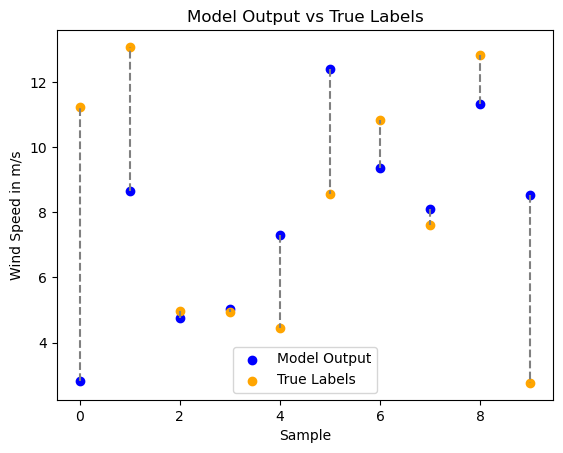

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
samples = np.arange(len(model_output[0:10]))

# Scatter plot for model output and true labels
plt.scatter(samples, model_output[0:10], color='blue')
plt.scatter(samples, labels[0:10], color='orange')

# Draw lines connecting the model output and true labels
for i in range(len(samples)):
    plt.plot([samples[i], samples[i]], [model_output[i], labels[i]], color='gray', linestyle='--')

plt.xlabel('Sample')
plt.ylabel('Wind Speed in m/s')
plt.legend(['Model Output', 'True Labels'])
plt.title('Model Output vs True Labels')
plt.savefig('../output_images/model_output_vs_true_labels_scatter.png')
plt.show()